PHYS 321B 

# Assignment #8

## Setting things up

In [64]:
import math as m
import matplotlib.pyplot as plt
import sympy as sym
from sympy import Symbol, Matrix, cos, sin, init_printing, simplify, diff
from sympy import *
from math import pi
from fractions import Fraction
from sympy.physics.vector import dynamicsymbols
from sympy.physics.mechanics import *
from sympy.functions import transpose
sym.init_printing(use_latex='mathjax')
init_vprinting() # Use dots for time derivatives

# Symbols
M = Symbol('M')
m = Symbol('m')
R = Symbol('R')
g = Symbol('g')
t = Symbol('t')
theta, phi, psi, x, y, z = dynamicsymbols('theta phi psi x y z')

# Time derivatives of symbols
thetad, phid, psid, xd, yd, zd = dynamicsymbols('theta phi psi x y z', 1)

# Rotation matricies
Rx = Matrix([[1, 0, 0], [0, cos(theta), -sin(theta)], [0, sin(theta), cos(theta)]]) # Around x-axis
Rz = Matrix([[cos(phi), -sin(phi), 0], [sin(phi), cos(phi), 0], [0, 0, 1]]) # Around z-axis

# Rotation matrix transposes
RxT = transpose(Rx)
RzT = transpose(Rz)

#### Rotation matrix

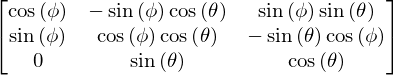

In [65]:
Rot = simplify(Rz*Rx)
Rot

Transpose of the rotation matrix

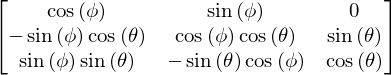

In [66]:
RotT = simplify(RxT*RzT)
RotT

#### Total angular velocity vector 

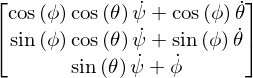

In [67]:
omega = Matrix([psid*cos(theta)*cos(phi)+thetad*cos(phi), psid*cos(theta)*sin(phi)+thetad*sin(phi), psid*sin(theta)+phid])
omega

Transpose of the angular velocity vector

In [68]:
omegaT = transpose(omega)
omegaT

## Question 1


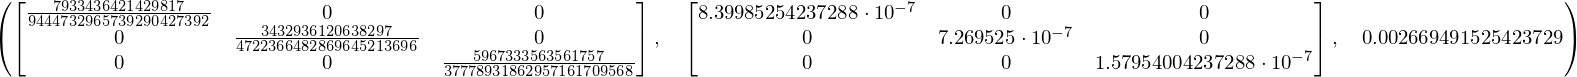

In [69]:
# The moment of inertias functions (but without pi, need to multiply later)
def Inertias(R1=5e-3, l1=50e-3, p1=2700, R2=3e-3, l2=25e-3, p2=2700):
    R12 = R1**2
    R22 = R2**2
    M1 = R12*l1*p1
    M2 = R22*l2*p2
    dcm = (R22*l2*p2*(R1+l2/2)) / (R12*l1*p1 + R22*l2*p2)
    I1h = (1/12)*M1*(l1**2 + 3*R12)
    I2h = (1/12)*M2*(l2**2 + 3*R22)
    I1v = (1/2)*M1*R12
    I2v = (1/2)*M2*R22
    Ixx = I1h + M1*dcm**2 + I2h + M2*(l2/2 - dcm)**2
    Iyy = I1h + I2v
    Izz = I1v + M1*dcm**2 + I2h + M2*(l2/2 - dcm)**2
    IT1 = Matrix([[Fraction(Ixx), 0, 0],[0, Fraction(Iyy), 0], [0, 0, Fraction(Izz)]])
    IT2 = Matrix([[Ixx, 0, 0],[0, Iyy, 0], [0, 0, Izz]])
    return(IT1, IT2, dcm)

Inertias() # First in fractions, then in decimals. Along with distance to center of mass. Must multiply by pi

In [90]:
# The components for the moments of inertias
Ixx = Inertias()[0][0,0]*pi
Iyy = Inertias()[0][1,1]*pi
Izz = Inertias()[0][2,2]*pi

# The rate of rotation
omega_sq = 6*pi

# Flipping components
omega_fzy = omega_sq*(Iyy-Izz)*(Izz-Ixx)/(Iyy*Ixx)
omega_fzy # Rotation around z, flip around y
omega_fzx = omega_sq*(Izz-Ixx)*(Iyy-Ixx)/(Iyy*Ixx)
omega_fzx # Rotation around z, flip around x
omega_fxy = omega_sq*(Ixx-Iyy)*(Izz-Ixx)/(Iyy*Izz)
omega_fxy # Rotation around x, flip around y
omega_fxz = omega_sq*(Izz-Ixx)*(Ixx-Iyy)/(Iyy*Izz)
omega_fxz # Rotation around x, flip around z
omega_fyx = omega_sq*(Ixx-Iyy)*(Iyy-Ixx)/(Ixx*Izz)
omega_fyx # Rotation around y, flip around x
omega_fyz = omega_sq*(Iyy-Izz)*(Ixx-Iyy)/(Ixx*Izz)
omega_fyz # Rotation around y, flip around z
print('omega_fzy =', omega_fzy)
print('omega_fzx =', omega_fzx)
print('omega_fxy =', omega_fxy)
print('omega_fxz =', omega_fxz)
print('omega_fyx =', omega_fyx)
print('omega_fyz =', omega_fxz)

omega_fzy = -11.9795035012115
omega_fzx = 2.37975369921164
omega_fxy = -12.6553171330273
omega_fxz = -12.6553171330273
omega_fyx = -1.81512877222807
omega_fyz = -12.6553171330273


## Question 2
### Lab frame

#### Moment of Intertia tensor

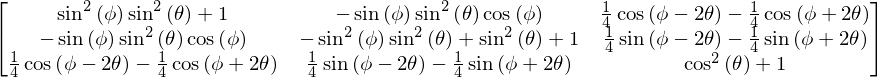

In [71]:
I2 = Matrix([ [1, 0, 0], [0, 1, 0], [0, 0, 2] ])
I2_new = (Rot*I2*RotT).simplify() # Remember to multiply by 1/4 MR^2 !!!
I2_new # Remember to multiply by 1/2 MR^2

#### Kinetic energy

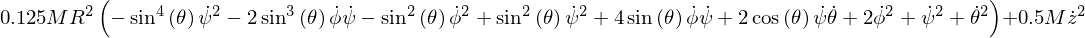

In [72]:
T2R = (omegaT*I2_new*omega).simplify()
T2r = T2R[0].simplify() # Remember to multiply by (1/2)(1/4)(MR^2 omega^2) !!!
T2 = (1/8)*M*(R**2)*T2r + 0.5*M*zd**2
T2

#### Potential energy

In [73]:
V2 = M*g*R*cos(theta)
V2

#### Lagrangian 

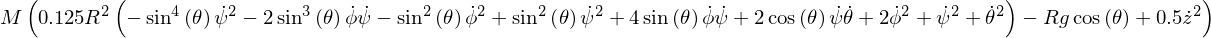

In [74]:
L2 = (T2 - V2).simplify()
L2

####  Equations of motion 

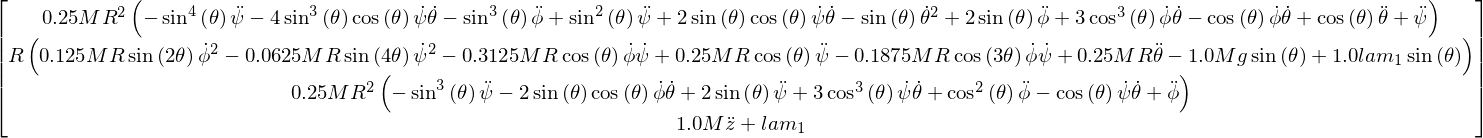

In [75]:
LM2 = LagrangesMethod(L2, [psi, theta, phi, z], nonhol_coneqs=[zd + thetad*R*sin(theta)])
EoM2 = LM2.form_lagranges_equations()

# Simplfy the equations of motion
EOM2 = Matrix([EoM2[0].simplify(), EoM2[1].simplify(), EoM2[2].simplify(), EoM2[3].simplify()])
EOM2

## Question 3
### Lab frame
#### Transformation matrix to translate the ring
What this does is shift the placement of the ring so the axis of rotation do not go through the center of mass, but through the point the ring makes contact with the surface. 

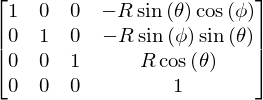

In [80]:
A = Matrix([ [1, 0, 0, -R*sin(theta)*cos(phi)], [0, 1, 0, -R*sin(theta)*sin(phi)], [0, 0, 1, R*cos(theta)], [0, 0, 0, 1] ])
A

#### Moment of inertial for the ring 

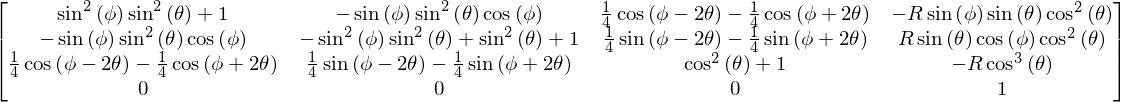

In [81]:
I3 = I2_new # Remember to multiply by 1/2 MR^2 !!!
I31 = I3.row_insert(3, Matrix([[0, 0, 0]]))
I32 = I31.col_insert(3, Matrix([0, 0, 0, 1]))
I32

I3_new = (A*I32*(A**-1)).simplify()
I3_new

#### The total angular velocity vector

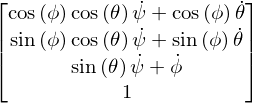

In [82]:
omega3 = omega.row_insert(3, Matrix([1]))
omega3T = transpose(omega3)
omega3

#### Kinetic energy

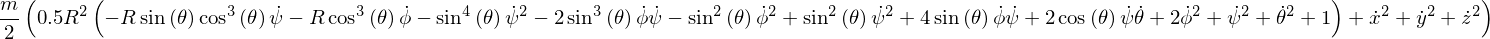

In [83]:
T3r = (omega3T*I3_new*omega3).simplify()
T3l = T3r[0] # This is just the kinetic energy from rotation
T3 = ((1/4)*m*R**2 * T3l + (m/2)*(xd**2 + yd**2 + zd**2)).simplify()
T3

#### Potential Energy

In [84]:
V3 = m*g*z
V3

#### Lagrangian 

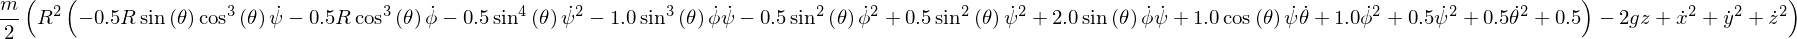

In [85]:
L3 = (T3 - V3).simplify()
L3

#### Equations of motion 
The equations of motion here does not include the constraints. Will add later by hand.

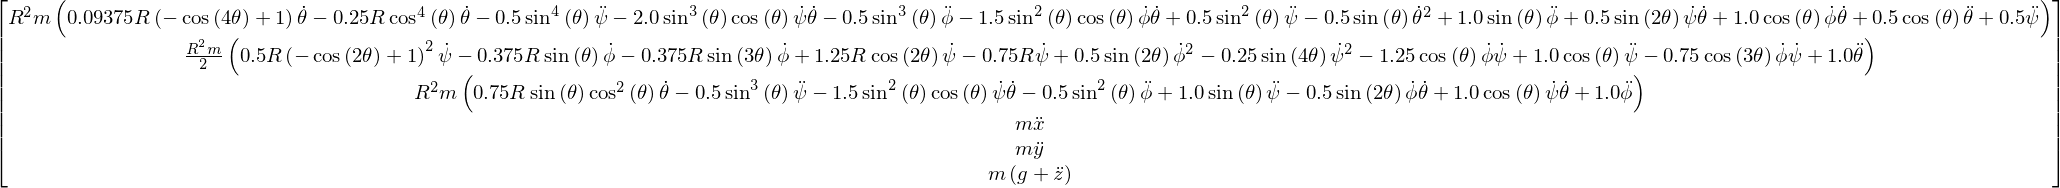

In [86]:
LM3 = LagrangesMethod(L3, [psi, theta, phi, x, y, z]) 
EoM3 = LM3.form_lagranges_equations()

# Simplfy the monstrosity
EOM3 = Matrix([EoM3[0].simplify(), EoM3[1].simplify(), EoM3[2].simplify(), EoM3[3].simplify(), EoM3[4].simplify(), EoM3[5].simplify()])
EOM3